In [1]:
import time
import numpy as np
import pandas as pd
import os
import ast
import torch
import pickle

import sys
sys.path.append('/home/ngrav/project/')
from wearables.scripts import data as weardata
from wearables.scripts import eval_ as weareval

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

# load results files

In [2]:
pfp = '/home/ngrav/project/wearables/results/'

# result files
result_files = {
    'GRU': (os.path.join(pfp, 'eval_v71.csv'), None),
    'InceptionTime': (os.path.join(pfp, 'eval_v71.csv'), None),
    'CNN': (os.path.join(pfp, 'eval_test_v43.csv'), None),
    'nonDL': (os.path.join(pfp, 'model_cmp_nonDL_v71.csv'),None),
    'nonDL_old': (os.path.join(pfp, 'model_cmp_nonDL.csv'), None),
    'ITrand': (os.path.join(pfp, 'eval_v52.csv'), None),
}
result_files = {k:(v[0], pd.read_csv(v[0], index_col=0)) for k,v in result_files.items()}

# load up to date md
md = pd.read_csv(os.path.join(pfp, 'md_v72_220909.csv'), index_col=0) # all fitlered out
# # filter out patients
# cohort = pd.read_csv('/home/ngrav/data/wearables/processed/List_1260.csv')
# valid_ids = cohort['x'].to_list() # convert to int64?
# md = md.loc[md['record_id'].isin(valid_ids), :]

# store remainder
results = pd.DataFrame()

# single results file

file by file

## nonDL

In [3]:
dt = result_files['nonDL'][1].reset_index()#.loc[~result_files['InceptionTime'][1].index.isna()].reset_index()

## Methods

### NOTE

Add back in TimeSeriesForest since an update in the conda env or repo stopped the `ComposableTimeSeriesForest` class from compiling, so the old cohort must be used. 

In [4]:
dtt = result_files['nonDL_old'][1].reset_index()#.loc[~result_files['InceptionTime'][1].index.isna()].reset_index()
dt = dt.append(dtt.loc[dtt['model']=='TimeSeriesForest', :])

In [5]:
for i in dt['model'].unique():
    print(i)

kNN
RandomForest
Gradient Boosting (LightGBM)
TimeSeriesForest


In [6]:
for i, idx in enumerate(dt.index):
    if 'knn' in dt.loc[idx, 'model'].lower():
        results = results.append(
            pd.DataFrame({
                'Model': 'kNN',
                'Trial': i+1,
                'MAE': float(dt.loc[idx, 'mae']),
                'Rho': float(dt.loc[idx, 'rho']),
            }, index=['kNN_{}'.format(i+1)]))
    elif 'random' in dt.loc[idx, 'model'].lower():
        results = results.append(
            pd.DataFrame({
                'Model': 'RandomForest',
                'Trial': i+1,
                'MAE': float(dt.loc[idx, 'mae']),
                'Rho': float(dt.loc[idx, 'rho']),
            }, index=['RF_{}'.format(i+1)]))
    elif 'gradient' in dt.loc[idx, 'model'].lower():
        results = results.append(
            pd.DataFrame({
                'Model': 'Gradient Boosting',
                'Trial': i+1,
                'MAE': float(dt.loc[idx, 'mae']),
                'Rho': float(dt.loc[idx, 'rho']),
            }, index=['LightGBM_{}'.format(i+1)]))
    elif 'timeseriesforest' in dt.loc[idx, 'model'].lower():
        results = results.append(
            pd.DataFrame({
                'Model': 'TimeSeriesForest',
                'Trial': i+1,
                'MAE': float(dt.loc[idx, 'mae']),
                'Rho': float(dt.loc[idx, 'rho']),
            }, index=['TSForest_{}'.format(i+1)]))


## GRU/LSTM

In [7]:
dt = result_files['GRU'][1].loc[~result_files['GRU'][1].index.isna()].reset_index()

In [8]:
for i, idx in enumerate(dt.index):
    if 'gruv71' in dt.loc[idx, 'exp_trial']:
        results = results.append(
            pd.DataFrame({
                'Model': 'GRU',
                'Trial': i+1,
                'MAE': float(dt.loc[idx, 'mae']),
                'Rho': float(dt.loc[idx, 'rho']),
            }, index=['RNN_{}'.format(i+1)]))


## CNN

In [9]:
dt = result_files['CNN'][1].loc[~(result_files['CNN'][1].index.isna())].reset_index()


In [10]:
# for i, idx in enumerate(dt.index):
#     if 'cnnv71' in dt.loc[idx, 'exp_trial']:
#         results = results.append(
#             pd.DataFrame({
#                 'Model': 'VGG-1D',
#                 'Trial': i+1,
#                 'MAE': float(dt.loc[idx, 'mae']),
#                 'Rho': float(dt.loc[idx, 'rho']),
#             }, index=['CNN_{}'.format(i+1)]))

for i, idx in enumerate(dt.index):
    if 'cnnv43l1l2' in dt.loc[idx, 'exp_trial']:
        results = results.append(
            pd.DataFrame({
                'Model': 'VGG-1D',
                'Trial': i+1,
                'MAE': float(dt.loc[idx, 'mae']),
                'Rho': float(dt.loc[idx, 'rho']),
            }, index=['CNN_{}'.format(i+1)]))


In [11]:
results

,Model,Trial,MAE,Rho
kNN_1,kNN,1,8.527790,0.198890
kNN_2,kNN,2,8.737691,0.152173
kNN_3,kNN,3,8.208869,0.250988
kNN_4,kNN,4,8.487773,0.235238
kNN_5,kNN,5,8.542672,0.193070
kNN_6,kNN,6,8.847845,0.147407
kNN_7,kNN,7,8.658407,0.176073
kNN_8,kNN,8,8.590021,0.186913
kNN_9,kNN,9,8.523851,0.222394
kNN_10,kNN,10,8.616957,0.218940


## IT

In [12]:
dt = result_files['InceptionTime'][1].loc[~result_files['InceptionTime'][1].index.isna()].reset_index()


In [13]:
# add rand
dtt = result_files['ITrand'][1].loc[~result_files['ITrand'][1].index.isna()].reset_index()
dt = dt.append(dtt).reset_index()

In [14]:
for i, idx in enumerate(dt.index):
    if 'itrandv52' in dt.loc[idx, 'exp_trial']:
        results = results.append(
            pd.DataFrame({
                'Model': 'InceptionTime (Random)',
                'Trial': i+1,
                'MAE': float(dt.loc[idx, 'mae']),
                'Rho': float(dt.loc[idx, 'rho']),
            }, index=['InceptionTime_rand_{}'.format(i+1)]))


In [15]:
for i, idx in enumerate(dt.index):
    if 'itv71' in dt.loc[idx, 'exp_trial']:
        results = results.append(
            pd.DataFrame({
                'Model': 'Ours',
                'Trial': i+1,
                'MAE': float(dt.loc[idx, 'mae']),
                'Rho': float(dt.loc[idx, 'rho']),
            }, index=['InceptionTime_{}'.format(i+1)]))


In [16]:
results.sort_values(by='MAE')

,Model,Trial,MAE,Rho
InceptionTime_4,Ours,4,7.520000,0.454621
InceptionTime_1,Ours,1,7.580503,0.389630
InceptionTime_5,Ours,5,7.592219,0.375104
InceptionTime_3,Ours,3,7.602935,0.403225
RNN_11,GRU,11,7.625721,0.400083
...,...,...,...,...
kNN_6,kNN,6,8.847845,0.147407
InceptionTime_rand_36,InceptionTime (Random),36,8.865478,-0.182510
InceptionTime_rand_39,InceptionTime (Random),39,8.867187,-0.204425
InceptionTime_rand_34,InceptionTime (Random),34,8.877923,-0.054457


# head-to-head summary

In [17]:
def p_encoder(p):
    if p > 0.05:
        label = '' # n.s.
    elif p <= 0.001:
        label = '***'
    elif p <= 0.05 and p > 0.01:
        label = '*'
    elif p <= 0.01 and p > 0.001:
        label = '**'
    else: 
        label = 'Unclassified'
    return label

def summarize_long_table(results_longtab, metrics=['MAE', 'Rho'], group='Model', out_file=None):
    '''
    Arguments:
      results_longtab (pd.DataFrame): assumes that replicates are indicated in a trial col
        but otherwise repeated according to the group colname
    '''
    from scipy.stats import ttest_ind
    summary = pd.DataFrame()
    
    for g in results_longtab[group].unique():
        summary.loc[g, group] = g
        for m in metrics:
            temp = {}
            others = [gg for gg in results_longtab[group].unique() if gg!=g]
            a = results_longtab.loc[results_longtab[group]==g, m].to_numpy()
            summary.loc[g, m] = '{:.2f} ({:.2f})'.format(np.mean(a), np.std(a))
            for gg in others:
                b = results_longtab.loc[results_longtab[group]==gg, m].to_numpy()
                statistic, p = ttest_ind(a, b)
                temp['v.{}'.format(gg)] = (np.max(a) - np.max(b), p)
            # only retain min
            k2keep = min(temp, key=temp.get)
            summary.loc[g, 'Top-1 diff ({})'.format(m)] = '{:.2f} ({})'.format(temp[k2keep][0], k2keep)
            summary.loc[g, 'P ({})'.format(m)] = '{:.2e}{} ({})'.format(temp[k2keep][1], p_encoder(temp[k2keep][1]), k2keep)
    if out_file is not None:
        summary.to_csv(out_file)
    return summary

In [18]:
summarize_long_table(results, out_file=os.path.join(pfp, 'results_head2head_v72.csv'))

,Model,MAE,Top-1 diff (MAE),P (MAE),Rho,Top-1 diff (Rho),P (Rho)
kNN,kNN,8.57 (0.16),-0.18 (v.InceptionTime (Random)),1.16e-03** (v.InceptionTime (Random)),0.20 (0.03),-0.20 (v.Ours),1.67e-08*** (v.Ours)
RandomForest,RandomForest,8.24 (0.11),-0.63 (v.InceptionTime (Random)),1.90e-09*** (v.InceptionTime (Random)),0.21 (0.04),-0.15 (v.Ours),3.57e-07*** (v.Ours)
Gradient Boosting,Gradient Boosting,8.45 (0.15),-0.24 (v.InceptionTime (Random)),1.15e-05*** (v.InceptionTime (Random)),0.16 (0.04),-0.24 (v.Ours),2.13e-08*** (v.Ours)
TimeSeriesForest,TimeSeriesForest,7.94 (0.17),-0.72 (v.InceptionTime (Random)),2.79e-10*** (v.InceptionTime (Random)),0.31 (0.05),-0.06 (v.Ours),2.00e-03** (v.Ours)
GRU,GRU,7.79 (0.12),-1.11 (v.InceptionTime (Random)),8.17e-08*** (v.InceptionTime (Random)),0.38 (0.02),-0.05 (v.Ours),5.28e-01 (v.Ours)
VGG-1D,VGG-1D,8.00 (0.15),-0.74 (v.InceptionTime (Random)),2.00e-08*** (v.InceptionTime (Random)),0.29 (0.03),-0.13 (v.Ours),1.70e-04*** (v.Ours)
InceptionTime (Random),InceptionTime (Random),8.83 (0.09),0.18 (v.kNN),1.16e-03** (v.kNN),-0.09 (0.09),-0.38 (v.Ours),2.47e-08*** (v.Ours)
Ours,Ours,7.60 (0.05),-1.36 (v.InceptionTime (Random)),7.39e-13*** (v.InceptionTime (Random)),0.40 (0.03),0.05 (v.GRU),5.28e-01 (v.GRU)


# plot performances

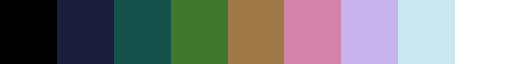

In [19]:
plt.get_cmap('cubehelix', 9)

In [20]:
model_cmap = {k:plt.get_cmap('cubehelix', 9)(i) for i, k in enumerate(results['Model'].unique())}

In [23]:
savefigs = True

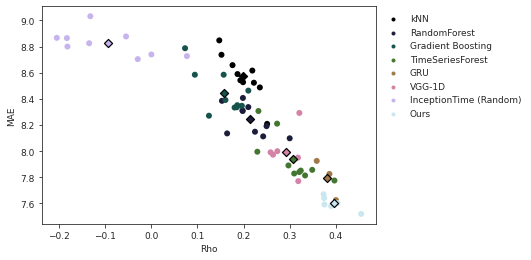

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.scatterplot(x='Rho', y='MAE', hue='Model', data=results, palette=model_cmap, ax=ax, linewidth=0) 
ax.legend(bbox_to_anchor=(1, 1))
for mod in results['Model'].unique():
    dt = results.loc[results['Model']==mod, :]
    ax.scatter(dt['Rho'].mean(), dt['MAE'].mean(), s=33, marker='D', edgecolors='k', linewidths=1.2, color=model_cmap[mod])
if savefigs:
    fig.savefig(os.path.join(pfp, 'scatter_results_maeVrho_v72.pdf'), bbox_inches='tight')

<AxesSubplot:xlabel='MAE', ylabel='Rho'>

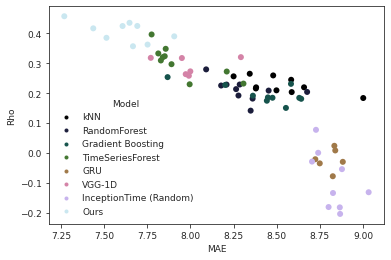

In [ ]:
sns.scatterplot(x='MAE', y='Rho', hue='Model', data=results, palette=model_cmap, linewidth=0) 

# visualize the data

In [26]:
def loadpkl(fp):
    with open(fp, 'rb') as f:
        return pickle.load(f)

In [27]:
# load data

pfp = '/home/ngrav/project/wearables/results/'
mfp = '/home/ngrav/scratch/wearables_model_zoo'

# filepaths to bst or pre-processed md with calculated metrics 
pp_md_fp = os.path.join(pfp, 'md_v72_220909.csv')
bst_trainer = os.path.join(mfp, 'trainer_itv71_InceptionTime_GA4.pkl')
bst_modelpkl = os.path.join(mfp, '281-itv71_InceptionTime_GA4.pkl')

# load up to date md
md = pd.read_csv(pp_md_fp, index_col=0)
trainer = loadpkl(bst_trainer)


In [28]:
# select a random pt with ptb to visualize, show IS

In [29]:
trainer.data.data.keys()

dict_keys(['IDs', 'data', 'md_summary', 'voi', 'cat_class_enc'])

In [31]:
# chk that old figure has valid_id
cohort = pd.read_csv('/home/ngrav/data/wearables/processed/List_1260.csv')
valid_ids = cohort['x'].to_list() # convert to int64?

# sample to viz
# ptb_i = md.loc[md['Pre-term birth'], :].sample(1)
# ptb_i

# activity = trainer.data.data['data']['1446_15']['activity'][:-1].to_numpy()

In [25]:
activity = trainer.data.data['data']['1446_15']['activity'][:-1].to_numpy()

In [96]:
def viz_pergrp(md, grpcol, trainer, n_samples=1, plot=True, out_file=None, verbose=False):
    '''
    Arguments:
      grpcol: str or list, if list, list of ids
    '''
    def plot_data(ax, activity, sleep, plot_title=None):
        sleep.replace(0, np.nan, inplace=True)
        ax.scatter(np.arange(activity.shape[0]), activity, c=activity, cmap='RdYlBu_r', s=0.5, rasterized=True, edgecolor='none')
        ax.plot(np.arange(activity.shape[0]), activity, color='gray', linewidth=0.1, alpha=0.75, rasterized=True)
        par3 = ax.twinx()
        par3.set_ylim(0, 1.1)
        par3.scatter(np.arange(activity.shape[0]), sleep, linewidth=0.1, color='#4297A0', s=0.05, rasterized=True, edgecolor='none')
        #par3.spines.right.set_position(("axes", 1.1))
        ax.set_xticks([])
        if plot_title is not None:
            ax.set_title(plot_title)
        return ax
    out_idx = []
    if plot:
        n_plots = len(md[grpcol].unique())*n_samples if not isinstance(grpcol, list) else len(grpcol)
        fig, ax = plt.subplots(n_plots, 1, figsize=(3, 1*n_plots)) 
        counter = 0
    if isinstance(grpcol, list):
        for j, idx in enumerate(grpcol):
            activity = trainer.data.data['data'][idx]['activity'][:-1].to_numpy()
            sleep = trainer.data.data['data'][idx]['sleep'][:-1]
            if plot:
                ax_i = plot_data(ax[counter], activity, sleep, plot_title='id: {}'.format(idx))
                counter += 1
            out_idx.append(idx)
    else:   
        for i, val in enumerate(md[grpcol].unique()):
            md_g = md.loc[md[grpcol]==val, :].sample(n_samples)
            idxs = list(md_g.index)
            for j, idx in enumerate(idxs):
                activity = trainer.data.data['data'][idx]['activity'][:-1].to_numpy()
                sleep = trainer.data.data['data'][idx]['sleep'][:-1]
                if plot:
                    plot_data(ax[counter], activity, sleep, plot_title='{}={}, id: {}'.format(grpcol, val, idx))
                    counter += 1
                out_idx.append(idx)
            
    fig.tight_layout()
    if out_file is not None and plot:
        fig.savefig(out_file, bbox_inches='tight', dpi=600)
    if verbose:
        print(md.loc[out_idx, :])
    return out_idx


In [33]:
2209 in valid_ids

True

In [34]:
1484 in valid_ids

True

In [97]:
idxoi = ['2209_15', '1484_9']

['2209_15', '1484_9']

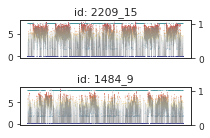

In [99]:
viz_pergrp(md, idxoi, trainer, out_file=os.path.join(pfp, 'act_viz_ptb_yn_rand.pdf'))

In [93]:
md.loc[['2209_15', '1484_9'], :]

,record_id,age_enroll,marital,gestage_by,insur,ethnicity,race,bmi_1vis,prior_ptb_all,fullterm_births,...,visit_num,PQSI,KPAS,EpworthSS,Edinburgh,Pre-term birth,y,yhat,split,error
unique_id,,,,,,,,,,,,,,,,,,,,,
2209_15,2209,29.0,1.0,2.0,3.0,0.0,0.0,19.673054,0.0,1.0,...,1,7.0,9.236291,6.0,2.0,False,15.0,15.775603,train,0.775603
1484_9,1484,28.0,1.0,2.0,1.0,0.0,1.0,30.598898,1.0,0.0,...,1,11.0,12.259957,10.0,2.0,True,9.0,21.779663,test,12.779663


## show association betwen ptb Y v. N and IS as a box plot

In [122]:
savefigs = True

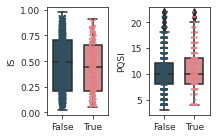

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(3,2))
ptb_cmap = {False: '#2F5061', True: '#E57F84'}
# IS, since not sig (see table 1)
sns.boxplot(x='Pre-term birth', y='IS', width=0.6, data=md, palette=ptb_cmap, ax=ax[0])
sns.stripplot(x='Pre-term birth', y='IS', hue='Pre-term birth', data=md, palette=ptb_cmap, s=2, ax=ax[0], rasterized=True)
# PQSI, since sig (see table 1)
sns.boxplot(x='Pre-term birth', y='PQSI', width=0.6, data=md, palette=ptb_cmap, ax=ax[1])
sns.stripplot(x='Pre-term birth', y='PQSI', hue='Pre-term birth', data=md, palette=ptb_cmap, s=2, ax=ax[1], rasterized=True)
for subax in ax:
    subax.set_xlabel('')
    subax.legend().set_visible(False)
fig.tight_layout()

if savefigs:
    fig.savefig(os.path.join(pfp, 'boxplot_all_pqsi_is_v_ptbyn_v72.pdf'), bbox_inches='tight', dpi=600)

In [74]:
from scipy.stats import mannwhitneyu

In [79]:
# print effect size and P-value 
def p_encoder(p):
    if p > 0.05:
        label = 'n.s.' # n.s.
    elif p <= 0.001:
        label = '***'
    elif p <= 0.05 and p > 0.01:
        label = '*'
    elif p <= 0.01 and p > 0.001:
        label = '**'
    else: 
        label = 'Unclassified'
    return label

def print_cont_pval(x, y, n_comparisons=1):
    print('<x>: {:.2e}\t<y>: {:.2e}\t<x>-<y>: {:.2e}'.format(np.mean(x), np.mean(y), np.mean(x) - np.mean(y)))
    stat, p = mannwhitneyu(x, y)
    p = p*n_comparisons
    print('P: {:.2e}\t{}'.format(p, p_encoder(p)))
    return stat, p

In [81]:
print_cont_pval(md.loc[(md['Pre-term birth']), 'IS'], md.loc[~(md['Pre-term birth']), 'IS'], n_comparisons=2)
print_cont_pval(md.loc[(md['Pre-term birth']), 'PQSI'], md.loc[~(md['Pre-term birth']), 'PQSI'], n_comparisons=2)

<x>: 4.40e-01	<y>: 4.68e-01	<x>-<y>: -2.79e-02
P: 8.95e-02	n.s.
<x>: 1.07e+01	<y>: 9.96e+00	<x>-<y>: 6.94e-01
P: 6.58e-03	**


(252770.0, 0.006583458834206379)

In [75]:
# print p value

mannwhitneyu(md.loc[(md['Pre-term birth']), 'IS'], md.loc[~(md['Pre-term birth']), 'IS'])

MannwhitneyuResult(statistic=263235.5, pvalue=0.04475489761268501)

In [78]:
mannwhitneyu(md.loc[(md['Pre-term birth']), 'PQSI'], md.loc[~(md['Pre-term birth']), 'PQSI'])

MannwhitneyuResult(statistic=252770.0, pvalue=0.0032917294171031894)

# performance by train/test and ptb+/- 

In [64]:

if False:
    md_res = pd.read_csv(os.path.join(pfp, 'md_res_220912.csv'), index_col=0)
    md = pd.read_csv(os.path.join(pfp, 'md_v72_220909.csv'), index_col=0) # all fitlered out
    # merge
    pd.merge(md, md_res[md_res.columns.difference(md.columns)], left_index=True, right_index=True, how='inner').to_csv(os.path.join(pfp, 'md_220912.csv'))
else:
    md = pd.read_csv(os.path.join(pfp, 'md_220912.csv'), index_col=0)

In [69]:
# add error
md['error'] = md['yhat'] - md['y']


In [66]:
savefigs = True

In [67]:
split_cmap = {'train': '#4297A0', 'test': '#F4EAE6'}

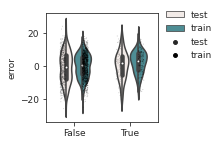

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(2,2))
ptb_cmap = {False: '#2F5061', True: '#E57F84'}
# IS, since not sig (see table 1)
# sns.boxplot(x='Pre-term birth', y='error', hue='split', data=md, width=0.6, palette=split_cmap, ax=ax, dodge=True)
sns.violinplot(x='Pre-term birth', y='error', hue='split', data=md.loc[md['split']!='val', :], width=0.6, palette=split_cmap, ax=ax, dodge=True)
sns.stripplot(x='Pre-term birth', y='error', hue='split', dodge=True, data=md.loc[md['split']!='val', :], color='k', s=1, alpha=0.25, ax=ax, rasterized=True)
# PQSI, since sig (see table 1)
# sns.boxplot(x='Pre-term birth', y='PQSI', width=0.6, data=md, palette=ptb_cmap, ax=ax[1])
# sns.stripplot(x='Pre-term birth', y='PQSI', hue='Pre-term birth', data=md, palette=ptb_cmap, s=2, ax=ax[1], rasterized=True)
ax.set_xlabel('')
ax.legend(bbox_to_anchor=(1, 1.1))

if savefigs:
    fig.savefig(os.path.join(pfp, 'violinplot_error_v_testtrain_ptbyn_v72.pdf'), bbox_inches='tight', dpi=600)

In [85]:
print_cont_pval(md.loc[(md['split']=='train') & (md['Pre-term birth']==True), 'error'], 
                md.loc[(md['split']=='train') & (md['Pre-term birth']==False), 'error'], 
                n_comparisons=1)
print_cont_pval(md.loc[(md['split']=='test') & (md['Pre-term birth']), 'error'], 
                md.loc[(md['split']=='test') & ~(md['Pre-term birth']), 'error'], 
                n_comparisons=1)

<x>: 2.49e+00	<y>: 1.83e-01	<x>-<y>: 2.31e+00
P: 4.26e-05	***
<x>: 5.63e-01	<y>: -7.55e-01	<x>-<y>: 1.32e+00
P: 1.12e-01	n.s.


(21635.0, 0.11249199520335518)

In [86]:
error_train_ptby = md.loc[(md['split']=='train') & (md['Pre-term birth']==True), 'error'].to_numpy()
error_train_ptbn = md.loc[(md['split']=='train') & (md['Pre-term birth']==False), 'error'].to_numpy()
error_test_ptby = md.loc[(md['split']=='test') & (md['Pre-term birth']==True), 'error'].to_numpy()
error_test_ptbn = md.loc[(md['split']=='test') & (md['Pre-term birth']==False), 'error'].to_numpy()

# output by train/test AND ptb+/-

In [87]:
traintest_ptbyn_cmap = {'train_ptby': '#F4EAE6',
                        'train_ptbn': '#4297A0',
                        'test_ptby': '#E57F84',
                        'test_ptbn': '#2F5061'}

In [88]:
from scipy.stats import spearmanr

def p_encoder(p):
    if p > 0.05:
        label = '' # n.s.
    elif p <= 0.001:
        label = '***'
    elif p <= 0.05 and p > 0.01:
        label = '*'
    elif p <= 0.01 and p > 0.001:
        label = '**'
    else: 
        label = 'Unclassified'
    return label

In [216]:
savefigs=True

train_ptbn	rho:0.70	9.24e-187
test_ptbn	rho:0.39	1.63e-23
train_ptby	rho:0.62	1.05e-19
test_ptby	rho:0.41	2.07e-04


/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


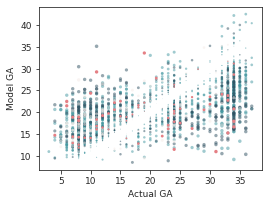

In [89]:
def add_scatterplot(ax, md, traintest_ptbyn_cmap, bool_byrow, k, txt_y=0.9, alpha=0.5):
    y = md.loc[bool_byrow, 'y']
    yhat = md.loc[bool_byrow, 'yhat']
    err = md.loc[bool_byrow, 'error']
    col = traintest_ptbyn_cmap[k]
    rho, p = spearmanr(y, yhat)
    print('{}\trho:{:.2f}\t{:.2e}'.format(k, rho, p))
    
    ax.scatter(y, 
               yhat,
               color=traintest_ptbyn_cmap[k],
               alpha=alpha,
               rasterized=True,
               linewidth=0, 
               s=4*np.log(err.abs()+1e-8))
    
#     ax.text(1, txt_y, 'r={:.2f}{}'.format(rho, p_encoder(p), transform=ax.transAxes, color=traintest_ptbyn_cmap[k]))

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

bool_byrow = ((md['split']=='train') & (md['Pre-term birth']==False))
k = 'train_ptbn'
add_scatterplot(ax, md, traintest_ptbyn_cmap, bool_byrow, k)

bool_byrow = ((md['split']=='test') & (md['Pre-term birth']==False))
k = 'test_ptbn'
add_scatterplot(ax, md, traintest_ptbyn_cmap, bool_byrow, k, txt_y=0.8)

bool_byrow = ((md['split']=='train') & (md['Pre-term birth']==True))
k = 'train_ptby'
add_scatterplot(ax, md, traintest_ptbyn_cmap, bool_byrow, k, txt_y=0.7)

bool_byrow = ((md['split']=='test') & (md['Pre-term birth']==True))
k = 'test_ptby'
add_scatterplot(ax, md, traintest_ptbyn_cmap, bool_byrow, k, txt_y=0.6, alpha=1.0)

ax.set_xlabel('Actual GA')
ax.set_ylabel('Model GA')
# ax.text(0.1, 0.9, 'HERE', transform=ax.transAxes, c=traintest_ptbyn_cmap[k])

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplot_traintest_ptbyn_yhatVy_v72.pdf'), bbox_inches='tight', dpi=600)

## pval est for test_ptby is worse than all others

In [90]:
a = np.random.uniform(size=(100,))
b = np.random.uniform(size=(100,))

In [91]:
(a>b).sum()/len(a)

0.54

In [92]:
def perm_test_oneVrest(md, n_iter=1000, n_sample=500, verbose=True):
    if verbose:
        tic = time.time()
    mean_sqdiff_rhos = {'obs': [], 'null': []}
    for i in range(n_iter):
        # obs
        idx_pos = list(md.loc[(md['split']=='test') & (md['Pre-term birth']==True)].sample(n_sample, replace=True).index)
        idx_neg = list(md.loc[~((md['split']=='test') & (md['Pre-term birth']==True))].sample(n_sample, replace=True).index)
        rho_pos, _ = spearmanr(md.loc[idx_pos, 'y'],
                               md.loc[idx_pos, 'yhat'])
        rho_neg, _ = spearmanr(md.loc[idx_neg, 'y'],
                               md.loc[idx_neg, 'yhat'])
        mean_sqdiff_rhos['obs'].append((rho_pos - rho_neg)**2)

        # null
        idx_pos = list(md.sample(n_sample, replace=True).index)
        idx_neg = list(md.sample(n_sample, replace=True).index)
        rho_pos, _ = spearmanr(md.loc[idx_pos, 'y'],
                               md.loc[idx_pos, 'yhat'])
        rho_neg, _ = spearmanr(md.loc[idx_neg, 'y'],
                               md.loc[idx_neg, 'yhat'])
        mean_sqdiff_rhos['null'].append((rho_pos - rho_neg)**2)
        
        if verbose and i % 100 == 0:
            print('through {} iter in {:.0f}-s'.format(i+1, time.time() - tic))
    p_est = (mean_sqdiff_rhos['obs'] > mean_sqdiff_rhos['null']) / n_iter
    return mean_sqdiff_rhos, p_est

In [93]:
metrics, p = perm_test_oneVrest(md)
p

through 1 iter in 0-s
through 101 iter in 1-s
through 201 iter in 2-s
through 301 iter in 2-s
through 401 iter in 3-s
through 501 iter in 4-s
through 601 iter in 5-s
through 701 iter in 5-s
through 801 iter in 6-s
through 901 iter in 7-s


0.001

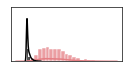

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(2, 1))
sns.histplot(metrics['obs'], label='obs', color='#E57F84', ax=ax)
sns.histplot(metrics['null'], label='null', color='black', ax=ax)
sns.kdeplot(metrics['obs'], label='obs', color='#E57F84', ax=ax)
sns.kdeplot(metrics['null'], label='null', color='black', ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('')
fig.savefig(os.path.join(pfp, 'histplot_test_ptby_Vnull_v72.pdf'), bbox_inches='tight')

In [251]:
a = np.array([6, 1,2,3,4])
b = np.array([1, 2, 3, 5, 4])
a > b

array([ True, False, False, False, False])

# supplemental figs showing corrs

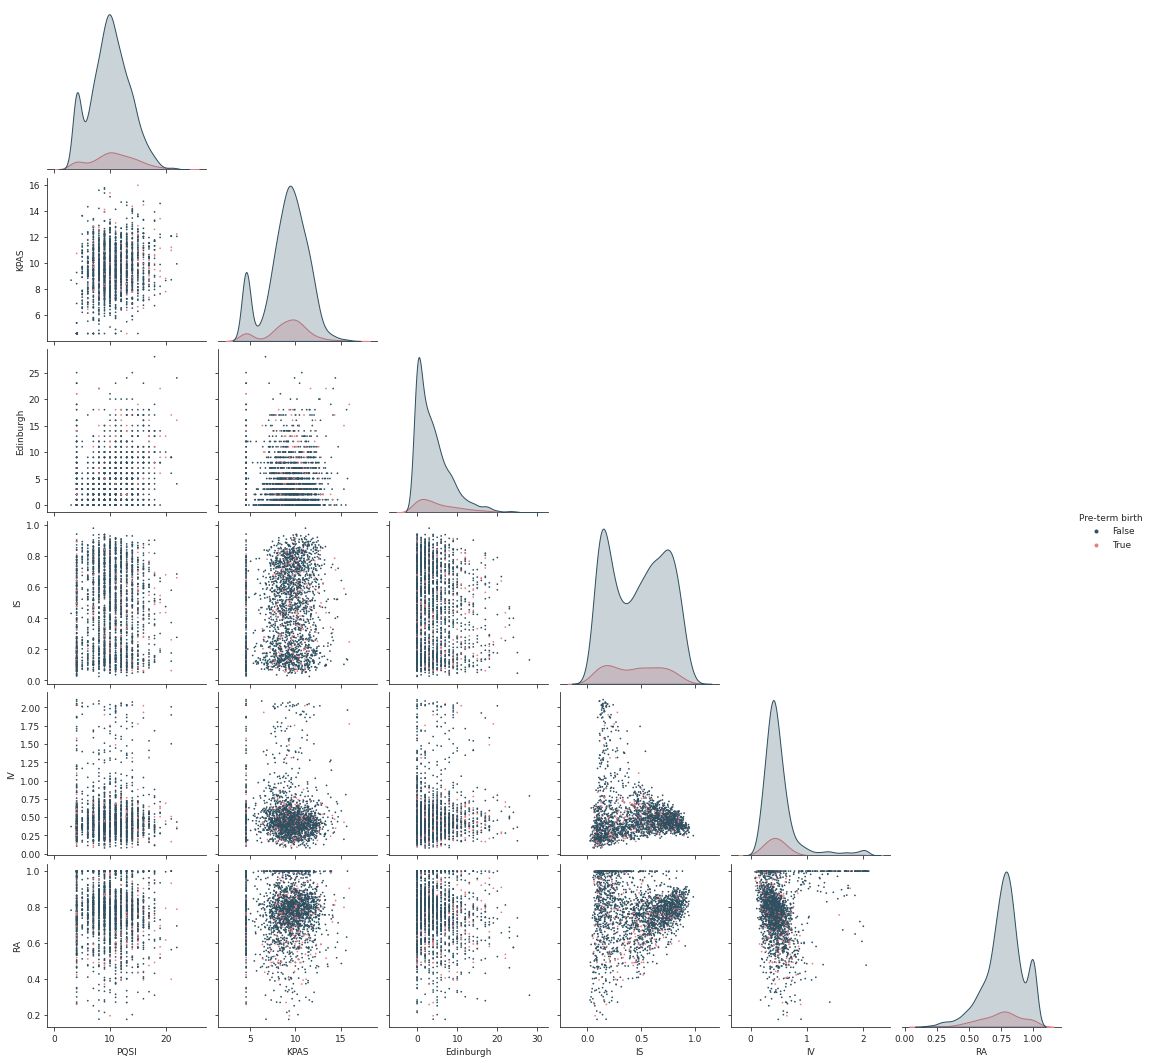

In [95]:
p = sns.pairplot(
    md, 
    hue='Pre-term birth', palette=ptb_cmap, 
    vars=['PQSI', 'KPAS', 'Edinburgh',
       'IS', 'IV', 'RA'], 
    corner=True,
    kind='scatter', diag_kind='kde', plot_kws={'linewidth': 0, 's': 3, 'rasterized': True})
p.savefig(os.path.join(pfp, 'pairplot_voi_md_v72.pdf'), bbox_inches='tight')

In [96]:
var_list = ['PQSI', 'KPAS', 'Edinburgh', 'IS', 'IV', 'RA']

In [97]:
def rho_matrixplot(var_list, data, out_file=None):
    df = pd.DataFrame(index=var_list, columns=var_list, dtype='float64')
    for i, var_i in enumerate(var_list):
        for j, var_j in enumerate(var_list):
            rho, _ =  spearmanr(data[var_i], data[var_j])
            df.loc[var_i, var_j] = rho
            df.loc[var_j, var_i] = rho
    p = sns.clustermap(df, linewidths=0.5, cmap='RdYlBu_r')
    if out_file is not None:
        p.savefig(out_file)
    return df

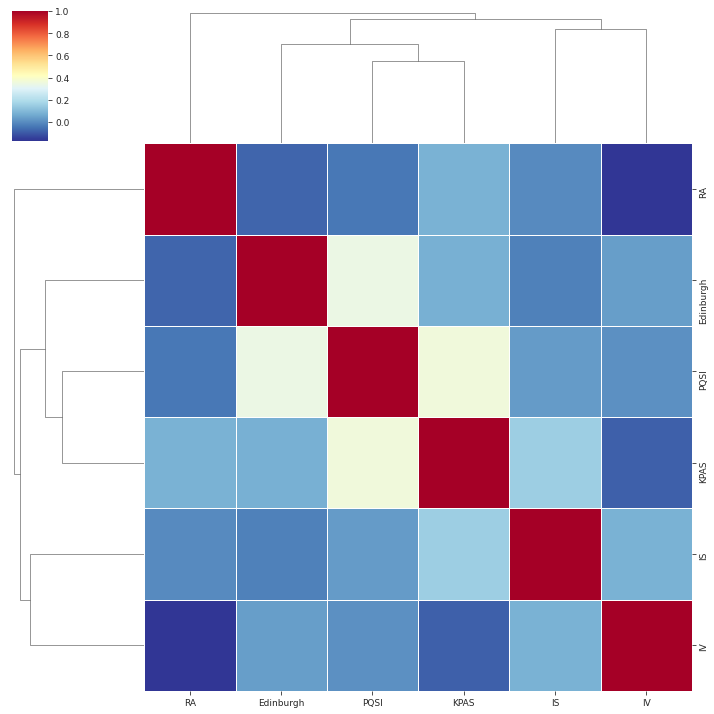

In [98]:
# matrix plot
df = rho_matrixplot(var_list, md, out_file=os.path.join(pfp, 'matrixplot_voi_corr_v72.pdf'))

In [100]:
def biaxial_fx(y_vars, data, x_var='GA', palette=None, hue='Pre-term birth', out_file=None):
    x = data[x_var]
    fig = plt.figure(figsize=(3.5, 4))
    for i, var in enumerate(y_vars):
        y = data[var]
        ax = fig.add_subplot(3, 2, i+1)
        ax.scatter(x, y, 
                   c=data[hue] if palette is None else data[hue].map(palette),
                   s=3, linewidth=0, alpha=0.8, rasterized=True)
        ax.set_ylabel(var)
        
        rho, p = spearmanr(x, y)
#         ax.text(0.1, 0.8, 'r={:.2f}{}'.format(rho, p_encoder(p)), transform=ax.transAxes, weight='bold')
        ax.set_title('r={:.2f}{}'.format(rho, p_encoder(p)))
        if i==4 or i==5:
            ax.set_xlabel('Actual GA')
    fig.tight_layout()
    if out_file is not None:
        fig.savefig(out_file, bbox_inches='tight', dpi=600)
    
        
    

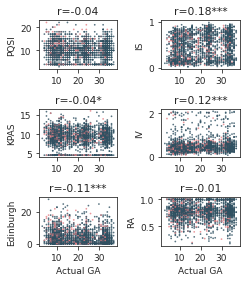

In [101]:
biaxial_fx(['PQSI', 'IS', 'KPAS', 'IV', 'Edinburgh', 'RA'], md, palette=ptb_cmap, out_file=os.path.join(pfp, 'biaxial_corrs_calcmetsVactualGA_v72.pdf'))